In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, Test_labels) = imdb.load_data(num_words=10000)

C:\Users\rgarregrah\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '!') for i in train_data[0]])
decoded_review

"! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ! is an amazing actor and now the same being director ! father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ! and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ! to the two little boy's that played the ! of norman and paul they were just brilliant children are often left out of the ! list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 形状が(len(sequences), dimension)の行列を作成し、0で埋める
    results = np.zeros((len(sequences), dimension))

    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results


# 訓練データのベクトル化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(Test_labels).astype('float32')

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20


  512/15000 [>.............................] - ETA: 1:53 - loss: 0.6939 - acc: 0.5020

 1024/15000 [=>............................] - ETA: 55s - loss: 0.6918 - acc: 0.5322 

 1536/15000 [==>...........................] - ETA: 35s - loss: 0.6848 - acc: 0.5482

 2048/15000 [===>..........................] - ETA: 26s - loss: 0.6751 - acc: 0.5967

 2560/15000 [====>.........................] - ETA: 20s - loss: 0.6629 - acc: 0.6223

 3072/15000 [=====>........................] - ETA: 16s - loss: 0.6532 - acc: 0.6452

 3584/15000 [======>.......................] - ETA: 13s - loss: 0.6476 - acc: 0.6406

 4096/15000 [=======>......................] - ETA: 11s - loss: 0.6424 - acc: 0.6421

 4608/15000 [========>.....................] - ETA: 9s - loss: 0.6315 - acc: 0.6589 

 5120/15000 [=========>....................] - ETA: 8s - loss: 0.6225 - acc: 0.6746

 5632/15000 [==========>...................] - ETA: 7s - loss: 0.6151 - acc: 0.6824

 6144/15000 [===========>..................] - ETA: 6s - loss: 0.6062 - acc: 0.6943

 6656/15000 [============>.................] - ETA: 5s - loss: 0.5992 - acc: 0.7028

 7168/15000 [=============>................] - ETA: 5s - loss: 0.5913 - acc: 0.7111

 7680/15000 [==============>...............] - ETA: 4s - loss: 0.5816 - acc: 0.7211

 8192/15000 [===============>..............] - ETA: 4s - loss: 0.5755 - acc: 0.7273

 8704/15000 [================>.............] - ETA: 3s - loss: 0.5697 - acc: 0.7331

 9216/15000 [=================>............] - ETA: 3s - loss: 0.5651 - acc: 0.7378

 9728/15000 [==================>...........] - ETA: 2s - loss: 0.5609 - acc: 0.7407

10240/15000 [===================>..........] - ETA: 2s - loss: 0.5553 - acc: 0.7461

10752/15000 [====================>.........] - ETA: 2s - loss: 0.5505 - acc: 0.7495

11264/15000 [=====================>........] - ETA: 1s - loss: 0.5447 - acc: 0.7549

11776/15000 [======================>.......] - ETA: 1s - loss: 0.5392 - acc: 0.7588

12288/15000 [=======================>......] - ETA: 1s - loss: 0.5342 - acc: 0.7632

12800/15000 [========================>.....] - ETA: 0s - loss: 0.5284 - acc: 0.7672

13312/15000 [=========================>....] - ETA: 0s - loss: 0.5233 - acc: 0.7705

13824/15000 [==========================>...] - ETA: 0s - loss: 0.5190 - acc: 0.7737

14336/15000 [===========================>..] - ETA: 0s - loss: 0.5144 - acc: 0.7769

14848/15000 [============================>.] - ETA: 0s - loss: 0.5100 - acc: 0.7801

15000/15000 [==============================] - 7s 438us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684


Epoch 2/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.3235 - acc: 0.9062

 1024/15000 [=>............................] - ETA: 1s - loss: 0.3204 - acc: 0.9180

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.3322 - acc: 0.9102

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.3278 - acc: 0.9111

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.3201 - acc: 0.9115

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.3176 - acc: 0.9138

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.3119 - acc: 0.9130

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.3081 - acc: 0.9156

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.3044 - acc: 0.9137

 7168/15000 [=============>................] - ETA: 0s - loss: 0.3092 - acc: 0.9081

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.3112 - acc: 0.9048

 9216/15000 [=================>............] - ETA: 0s - loss: 0.3106 - acc: 0.9046

10240/15000 [===================>..........] - ETA: 0s - loss: 0.3083 - acc: 0.9056

11264/15000 [=====================>........] - ETA: 0s - loss: 0.3084 - acc: 0.9047

12288/15000 [=======================>......] - ETA: 0s - loss: 0.3060 - acc: 0.9041

13312/15000 [=========================>....] - ETA: 0s - loss: 0.3036 - acc: 0.9045

14336/15000 [===========================>..] - ETA: 0s - loss: 0.3020 - acc: 0.9042

14848/15000 [============================>.] - ETA: 0s - loss: 0.3007 - acc: 0.9046

15000/15000 [==============================] - 2s 154us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897


Epoch 3/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.2119 - acc: 0.9355

 1024/15000 [=>............................] - ETA: 1s - loss: 0.2287 - acc: 0.9287

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.2228 - acc: 0.9316

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.2214 - acc: 0.9331

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.2238 - acc: 0.9316

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.2249 - acc: 0.9300

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.2226 - acc: 0.9324

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.2207 - acc: 0.9320

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.2211 - acc: 0.9323

 6656/15000 [============>.................] - ETA: 0s - loss: 0.2206 - acc: 0.9318

 7168/15000 [=============>................] - ETA: 0s - loss: 0.2216 - acc: 0.9316

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.2219 - acc: 0.9293

 9216/15000 [=================>............] - ETA: 0s - loss: 0.2227 - acc: 0.9277

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.2220 - acc: 0.9281

10240/15000 [===================>..........] - ETA: 0s - loss: 0.2203 - acc: 0.9285

10752/15000 [====================>.........] - ETA: 0s - loss: 0.2205 - acc: 0.9281

11264/15000 [=====================>........] - ETA: 0s - loss: 0.2210 - acc: 0.9277

11776/15000 [======================>.......] - ETA: 0s - loss: 0.2202 - acc: 0.9279

12288/15000 [=======================>......] - ETA: 0s - loss: 0.2215 - acc: 0.9268

13312/15000 [=========================>....] - ETA: 0s - loss: 0.2193 - acc: 0.9278

14336/15000 [===========================>..] - ETA: 0s - loss: 0.2182 - acc: 0.9282

15000/15000 [==============================] - 2s 157us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711


Epoch 4/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1951 - acc: 0.9375

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1949 - acc: 0.9336

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1856 - acc: 0.9434

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1822 - acc: 0.9447

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1765 - acc: 0.9478

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1777 - acc: 0.9473

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1762 - acc: 0.9488

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1768 - acc: 0.9466

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1752 - acc: 0.9476

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1749 - acc: 0.9473

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1740 - acc: 0.9486

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1727 - acc: 0.9482

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1723 - acc: 0.9482

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1724 - acc: 0.9481

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1747 - acc: 0.9455

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1765 - acc: 0.9442

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1770 - acc: 0.9433

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1764 - acc: 0.9436

14848/15000 [============================>.] - ETA: 0s - loss: 0.1753 - acc: 0.9437

15000/15000 [==============================] - 2s 154us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832


Epoch 5/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1320 - acc: 0.9688

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1402 - acc: 0.9658

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1383 - acc: 0.9639

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.1379 - acc: 0.9633

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.1358 - acc: 0.9651

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.1355 - acc: 0.9644

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1348 - acc: 0.9639

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.1398 - acc: 0.9609

 7168/15000 [=============>................] - ETA: 0s - loss: 0.1411 - acc: 0.9590

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.1402 - acc: 0.9583

 9216/15000 [=================>............] - ETA: 0s - loss: 0.1393 - acc: 0.9588

10240/15000 [===================>..........] - ETA: 0s - loss: 0.1394 - acc: 0.9581

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1406 - acc: 0.9570

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1412 - acc: 0.9564

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1413 - acc: 0.9555

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1429 - acc: 0.9544

14336/15000 [===========================>..] - ETA: 0s - loss: 0.1429 - acc: 0.9541

15000/15000 [==============================] - 2s 151us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872


Epoch 6/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1232 - acc: 0.9668

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1198 - acc: 0.9678

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.1093 - acc: 0.9727

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.1080 - acc: 0.9714

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.1079 - acc: 0.9717

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.1169 - acc: 0.9674

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.1156 - acc: 0.9675

 6656/15000 [============>.................] - ETA: 0s - loss: 0.1154 - acc: 0.9674

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.1164 - acc: 0.9663

 8704/15000 [================>.............] - ETA: 0s - loss: 0.1162 - acc: 0.9653

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.1155 - acc: 0.9652

10752/15000 [====================>.........] - ETA: 0s - loss: 0.1153 - acc: 0.9649

11264/15000 [=====================>........] - ETA: 0s - loss: 0.1147 - acc: 0.9648

11776/15000 [======================>.......] - ETA: 0s - loss: 0.1146 - acc: 0.9649

12288/15000 [=======================>......] - ETA: 0s - loss: 0.1153 - acc: 0.9646

12800/15000 [========================>.....] - ETA: 0s - loss: 0.1149 - acc: 0.9648

13824/15000 [==========================>...] - ETA: 0s - loss: 0.1154 - acc: 0.9646

14848/15000 [============================>.] - ETA: 0s - loss: 0.1149 - acc: 0.9650

15000/15000 [==============================] - 2s 152us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772


Epoch 7/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.1028 - acc: 0.9707

 1024/15000 [=>............................] - ETA: 1s - loss: 0.1017 - acc: 0.9707

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.1008 - acc: 0.9701

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0958 - acc: 0.9746

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0940 - acc: 0.9746

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0912 - acc: 0.9753

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0901 - acc: 0.9760

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0917 - acc: 0.9748

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0941 - acc: 0.9734

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0958 - acc: 0.9725

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0957 - acc: 0.9724

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0972 - acc: 0.9719

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0974 - acc: 0.9717

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0973 - acc: 0.9712

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0972 - acc: 0.9712

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0979 - acc: 0.9707

14848/15000 [============================>.] - ETA: 0s - loss: 0.0981 - acc: 0.9704

15000/15000 [==============================] - 2s 151us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3127 - val_acc: 0.8846


Epoch 8/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0727 - acc: 0.9844

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0672 - acc: 0.9854

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0710 - acc: 0.9818

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0690 - acc: 0.9836

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0729 - acc: 0.9805

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0757 - acc: 0.9787

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0749 - acc: 0.9789

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0751 - acc: 0.9787

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0747 - acc: 0.9788

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0746 - acc: 0.9790

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0758 - acc: 0.9786

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0786 - acc: 0.9772

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0803 - acc: 0.9766

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0797 - acc: 0.9769

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0797 - acc: 0.9767

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0790 - acc: 0.9771

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0793 - acc: 0.9772

15000/15000 [==============================] - 2s 150us/step - loss: 0.0807 - acc: 0.9763 - val_loss: 0.3859 - val_acc: 0.8649


Epoch 9/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0833 - acc: 0.9746

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0650 - acc: 0.9854

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0654 - acc: 0.9831

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0628 - acc: 0.9854

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0599 - acc: 0.9873

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0592 - acc: 0.9878

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0596 - acc: 0.9874

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0627 - acc: 0.9856

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0614 - acc: 0.9860

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0615 - acc: 0.9858

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0617 - acc: 0.9857

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0621 - acc: 0.9852

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0637 - acc: 0.9842

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0669 - acc: 0.9824

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0670 - acc: 0.9823

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0669 - acc: 0.9824

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0666 - acc: 0.9823

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0659 - acc: 0.9824

14848/15000 [============================>.] - ETA: 0s - loss: 0.0658 - acc: 0.9824

15000/15000 [==============================] - 2s 152us/step - loss: 0.0661 - acc: 0.9821 - val_loss: 0.3635 - val_acc: 0.8782


Epoch 10/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0553 - acc: 0.9922

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0508 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0518 - acc: 0.9915

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0514 - acc: 0.9907

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0517 - acc: 0.9891

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0534 - acc: 0.9886

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0530 - acc: 0.9888

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0526 - acc: 0.9891

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0524 - acc: 0.9885

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0525 - acc: 0.9883

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0511 - acc: 0.9892

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0520 - acc: 0.9892

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0517 - acc: 0.9889

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0516 - acc: 0.9886

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0529 - acc: 0.9878

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0564 - acc: 0.9861

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0569 - acc: 0.9855

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0561 - acc: 0.9855

14848/15000 [============================>.] - ETA: 0s - loss: 0.0557 - acc: 0.9856

15000/15000 [==============================] - 2s 152us/step - loss: 0.0561 - acc: 0.9853 - val_loss: 0.3843 - val_acc: 0.8792


Epoch 11/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0405 - acc: 0.9922

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0322 - acc: 0.9967

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0363 - acc: 0.9949

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0358 - acc: 0.9951

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0345 - acc: 0.9951

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0353 - acc: 0.9941

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0361 - acc: 0.9938

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0362 - acc: 0.9940

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0360 - acc: 0.9939

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0402 - acc: 0.9918

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0422 - acc: 0.9903

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0427 - acc: 0.9900

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0432 - acc: 0.9897

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0433 - acc: 0.9898

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0432 - acc: 0.9899

14848/15000 [============================>.] - ETA: 0s - loss: 0.0440 - acc: 0.9893

15000/15000 [==============================] - 2s 149us/step - loss: 0.0439 - acc: 0.9893 - val_loss: 0.4153 - val_acc: 0.8779


Epoch 12/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0291 - acc: 0.9961

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0284 - acc: 0.9971

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0266 - acc: 0.9976

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0274 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0276 - acc: 0.9969

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0286 - acc: 0.9967

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0303 - acc: 0.9959

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0329 - acc: 0.9947

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0336 - acc: 0.9944

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0329 - acc: 0.9947

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0325 - acc: 0.9947

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0331 - acc: 0.9946

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0337 - acc: 0.9945

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0335 - acc: 0.9945

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0342 - acc: 0.9940

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0346 - acc: 0.9936

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0373 - acc: 0.9923

14848/15000 [============================>.] - ETA: 0s - loss: 0.0381 - acc: 0.9922

15000/15000 [==============================] - 2s 148us/step - loss: 0.0381 - acc: 0.9921 - val_loss: 0.4525 - val_acc: 0.8690


Epoch 13/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0254 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0251 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0279 - acc: 0.9957

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0260 - acc: 0.9964

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0249 - acc: 0.9970

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0239 - acc: 0.9970

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0244 - acc: 0.9965

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0256 - acc: 0.9956

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0256 - acc: 0.9957

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0255 - acc: 0.9957

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0261 - acc: 0.9955

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0275 - acc: 0.9948

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0292 - acc: 0.9935

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0301 - acc: 0.9927

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0302 - acc: 0.9926

14848/15000 [============================>.] - ETA: 0s - loss: 0.0301 - acc: 0.9927

15000/15000 [==============================] - 2s 149us/step - loss: 0.0300 - acc: 0.9928 - val_loss: 0.4698 - val_acc: 0.8729


Epoch 14/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0179 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0185 - acc: 0.9980

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0181 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0181 - acc: 0.9977

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0189 - acc: 0.9972

 4608/15000 [========>.....................] - ETA: 0s - loss: 0.0187 - acc: 0.9972

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0191 - acc: 0.9972

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0190 - acc: 0.9973

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0189 - acc: 0.9974

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0190 - acc: 0.9974

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0194 - acc: 0.9971

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0231 - acc: 0.9951

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0253 - acc: 0.9940

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0252 - acc: 0.9941

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0249 - acc: 0.9944

14848/15000 [============================>.] - ETA: 0s - loss: 0.0248 - acc: 0.9945

15000/15000 [==============================] - 2s 147us/step - loss: 0.0247 - acc: 0.9945 - val_loss: 0.5023 - val_acc: 0.8726


Epoch 15/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0103 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0121 - acc: 0.9990

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0142 - acc: 0.9980

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0142 - acc: 0.9980

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0145 - acc: 0.9985

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0148 - acc: 0.9986

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0149 - acc: 0.9985

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0148 - acc: 0.9986

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0150 - acc: 0.9986

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0155 - acc: 0.9984

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0160 - acc: 0.9985

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0164 - acc: 0.9984

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0166 - acc: 0.9983

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0178 - acc: 0.9979

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0176 - acc: 0.9979

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0177 - acc: 0.9978

15000/15000 [==============================] - 2s 151us/step - loss: 0.0175 - acc: 0.9979 - val_loss: 0.5342 - val_acc: 0.8693


Epoch 16/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0180 - acc: 0.9941

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0156 - acc: 0.9961

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0128 - acc: 0.9980

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0128 - acc: 0.9984

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0125 - acc: 0.9987

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0124 - acc: 0.9988

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0120 - acc: 0.9990

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0121 - acc: 0.9992

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0121 - acc: 0.9992

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0122 - acc: 0.9990

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0127 - acc: 0.9990

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0143 - acc: 0.9987

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0150 - acc: 0.9984

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0151 - acc: 0.9983

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0149 - acc: 0.9983

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0149 - acc: 0.9983

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0147 - acc: 0.9983

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0144 - acc: 0.9983

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0146 - acc: 0.9983

15000/15000 [==============================] - 2s 153us/step - loss: 0.0149 - acc: 0.9983 - val_loss: 0.5710 - val_acc: 0.8697


Epoch 17/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0090 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0083 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0080 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0079 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 0s - loss: 0.0080 - acc: 0.9998

 5120/15000 [=========>....................] - ETA: 0s - loss: 0.0081 - acc: 0.9998

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0081 - acc: 0.9998

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0081 - acc: 0.9999

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0085 - acc: 0.9995

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0090 - acc: 0.9995

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0095 - acc: 0.9993

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0111 - acc: 0.9985

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0152 - acc: 0.9967

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0166 - acc: 0.9963

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0161 - acc: 0.9966

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0157 - acc: 0.9968

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0154 - acc: 0.9970

15000/15000 [==============================] - 2s 148us/step - loss: 0.0151 - acc: 0.9971 - val_loss: 0.6025 - val_acc: 0.8697


Epoch 18/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0075 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0063 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0066 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0066 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0063 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0061 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0064 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0064 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0064 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0064 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 0s - loss: 0.0064 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0063 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0062 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0061 - acc: 1.0000

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0060 - acc: 1.0000

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0061 - acc: 1.0000

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0062 - acc: 1.0000

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0064 - acc: 0.9998

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0064 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0068 - acc: 0.9997

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0071 - acc: 0.9997

14848/15000 [============================>.] - ETA: 0s - loss: 0.0074 - acc: 0.9996

15000/15000 [==============================] - 2s 159us/step - loss: 0.0075 - acc: 0.9996 - val_loss: 0.6782 - val_acc: 0.8633


Epoch 19/20
  512/15000 [>.............................] - ETA: 1s - loss: 0.0159 - acc: 0.9980

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0146 - acc: 0.9980

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0120 - acc: 0.9987

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0093 - acc: 0.9992

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0080 - acc: 0.9994

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0083 - acc: 0.9993

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0079 - acc: 0.9993

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0075 - acc: 0.9994

 5632/15000 [==========>...................] - ETA: 0s - loss: 0.0071 - acc: 0.9995

 6656/15000 [============>.................] - ETA: 0s - loss: 0.0069 - acc: 0.9995

 7168/15000 [=============>................] - ETA: 0s - loss: 0.0067 - acc: 0.9996

 7680/15000 [==============>...............] - ETA: 0s - loss: 0.0065 - acc: 0.9996

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0065 - acc: 0.9996

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0065 - acc: 0.9995

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0065 - acc: 0.9996

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0064 - acc: 0.9996

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0063 - acc: 0.9996

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0063 - acc: 0.9996

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0063 - acc: 0.9997

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0066 - acc: 0.9997

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0072 - acc: 0.9995

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0094 - acc: 0.9986

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0113 - acc: 0.9976

14848/15000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9975

15000/15000 [==============================] - 3s 206us/step - loss: 0.0117 - acc: 0.9975 - val_loss: 0.6693 - val_acc: 0.8674


Epoch 20/20
  512/15000 [>.............................] - ETA: 2s - loss: 0.0041 - acc: 1.0000

 1024/15000 [=>............................] - ETA: 1s - loss: 0.0036 - acc: 1.0000

 1536/15000 [==>...........................] - ETA: 1s - loss: 0.0039 - acc: 1.0000

 2048/15000 [===>..........................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 2560/15000 [====>.........................] - ETA: 1s - loss: 0.0041 - acc: 1.0000

 3072/15000 [=====>........................] - ETA: 1s - loss: 0.0041 - acc: 1.0000

 3584/15000 [======>.......................] - ETA: 1s - loss: 0.0041 - acc: 1.0000

 4096/15000 [=======>......................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 4608/15000 [========>.....................] - ETA: 1s - loss: 0.0040 - acc: 1.0000

 5120/15000 [=========>....................] - ETA: 1s - loss: 0.0039 - acc: 1.0000

 5632/15000 [==========>...................] - ETA: 1s - loss: 0.0038 - acc: 1.0000

 6144/15000 [===========>..................] - ETA: 1s - loss: 0.0038 - acc: 1.0000

 6656/15000 [============>.................] - ETA: 1s - loss: 0.0038 - acc: 1.0000

 7168/15000 [=============>................] - ETA: 1s - loss: 0.0038 - acc: 1.0000

 7680/15000 [==============>...............] - ETA: 1s - loss: 0.0037 - acc: 1.0000

 8192/15000 [===============>..............] - ETA: 0s - loss: 0.0037 - acc: 1.0000

 8704/15000 [================>.............] - ETA: 0s - loss: 0.0037 - acc: 1.0000

 9216/15000 [=================>............] - ETA: 0s - loss: 0.0040 - acc: 0.9999

 9728/15000 [==================>...........] - ETA: 0s - loss: 0.0040 - acc: 0.9999

10240/15000 [===================>..........] - ETA: 0s - loss: 0.0041 - acc: 0.9999

10752/15000 [====================>.........] - ETA: 0s - loss: 0.0041 - acc: 0.9999

11264/15000 [=====================>........] - ETA: 0s - loss: 0.0040 - acc: 0.9999

11776/15000 [======================>.......] - ETA: 0s - loss: 0.0040 - acc: 0.9999

12288/15000 [=======================>......] - ETA: 0s - loss: 0.0041 - acc: 0.9998

12800/15000 [========================>.....] - ETA: 0s - loss: 0.0041 - acc: 0.9998

13312/15000 [=========================>....] - ETA: 0s - loss: 0.0041 - acc: 0.9998

13824/15000 [==========================>...] - ETA: 0s - loss: 0.0041 - acc: 0.9999

14336/15000 [===========================>..] - ETA: 0s - loss: 0.0041 - acc: 0.9999

14848/15000 [============================>.] - ETA: 0s - loss: 0.0041 - acc: 0.9999

15000/15000 [==============================] - 3s 211us/step - loss: 0.0041 - acc: 0.9999 - val_loss: 0.6942 - val_acc: 0.8658


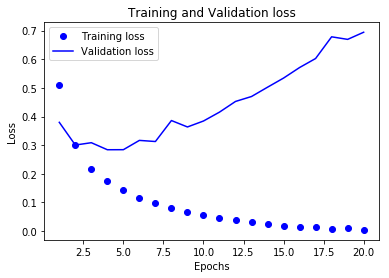

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

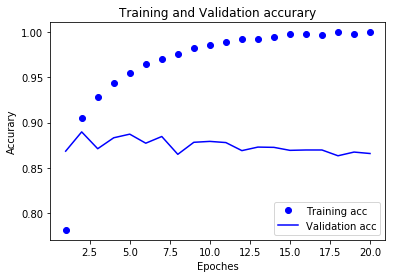

In [19]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and Validation accurary')
plt.xlabel('Epoches')
plt.ylabel('Accurary')
plt.legend()
plt.show()



In [21]:
model.predict(x_test)

array([[0.00524464],
       [0.9999999 ],
       [0.9105369 ],
       ...,
       [0.001587  ],
       [0.00558559],
       [0.46225673]], dtype=float32)

In [48]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4


  512/25000 [..............................] - ETA: 53s - loss: 0.6931 - acc: 0.5527

 1024/25000 [>.............................] - ETA: 27s - loss: 0.6929 - acc: 0.5371

 1536/25000 [>.............................] - ETA: 18s - loss: 0.6922 - acc: 0.5384

 2048/25000 [=>............................] - ETA: 14s - loss: 0.6917 - acc: 0.5312

 3072/25000 [==>...........................] - ETA: 9s - loss: 0.6906 - acc: 0.5228 

 4096/25000 [===>..........................] - ETA: 7s - loss: 0.6891 - acc: 0.5195

 4608/25000 [====>.........................] - ETA: 6s - loss: 0.6874 - acc: 0.5202

 5120/25000 [=====>........................] - ETA: 6s - loss: 0.6858 - acc: 0.5170

 6144/25000 [======>.......................] - ETA: 5s - loss: 0.6817 - acc: 0.5347

 7168/25000 [=======>......................] - ETA: 4s - loss: 0.6784 - acc: 0.5536

 8192/25000 [========>.....................] - ETA: 3s - loss: 0.6735 - acc: 0.5829

 8704/25000 [=========>....................] - ETA: 3s - loss: 0.6708 - acc: 0.5938

 9216/25000 [==========>...................] - ETA: 3s - loss: 0.6677 - acc: 0.6042

 9728/25000 [==========>...................] - ETA: 3s - loss: 0.6641 - acc: 0.6145

10240/25000 [===========>..................] - ETA: 2s - loss: 0.6612 - acc: 0.6208

11264/25000 [============>.................] - ETA: 2s - loss: 0.6562 - acc: 0.6339

12288/25000 [=============>................] - ETA: 2s - loss: 0.6497 - acc: 0.6511

13312/25000 [==============>...............] - ETA: 2s - loss: 0.6432 - acc: 0.6633

14336/25000 [================>.............] - ETA: 1s - loss: 0.6370 - acc: 0.6746

14848/25000 [================>.............] - ETA: 1s - loss: 0.6343 - acc: 0.6785

15360/25000 [=================>............] - ETA: 1s - loss: 0.6310 - acc: 0.6850

16384/25000 [==================>...........] - ETA: 1s - loss: 0.6229 - acc: 0.6956

17408/25000 [===================>..........] - ETA: 1s - loss: 0.6156 - acc: 0.7055

17920/25000 [====================>.........] - ETA: 1s - loss: 0.6119 - acc: 0.7102

18944/25000 [=====================>........] - ETA: 0s - loss: 0.6054 - acc: 0.7189

19968/25000 [======================>.......] - ETA: 0s - loss: 0.5994 - acc: 0.7265

20992/25000 [========================>.....] - ETA: 0s - loss: 0.5938 - acc: 0.7330

22016/25000 [=========================>....] - ETA: 0s - loss: 0.5893 - acc: 0.7384

23040/25000 [==========================>...] - ETA: 0s - loss: 0.5845 - acc: 0.7446

24064/25000 [===========================>..] - ETA: 0s - loss: 0.5811 - acc: 0.7493

25000/25000 [==============================] - 3s 138us/step - loss: 0.5775 - acc: 0.7532


Epoch 2/4


  512/25000 [..............................] - ETA: 2s - loss: 0.4608 - acc: 0.9102

 1536/25000 [>.............................] - ETA: 2s - loss: 0.4550 - acc: 0.9030

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.4477 - acc: 0.9016

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.4418 - acc: 0.9057

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.4401 - acc: 0.9080

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.4401 - acc: 0.9100

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.4400 - acc: 0.9091

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.4410 - acc: 0.9077

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.4405 - acc: 0.9068

 9216/25000 [==========>...................] - ETA: 1s - loss: 0.4397 - acc: 0.9069

10240/25000 [===========>..................] - ETA: 1s - loss: 0.4362 - acc: 0.9085

11264/25000 [============>.................] - ETA: 1s - loss: 0.4361 - acc: 0.9070

12288/25000 [=============>................] - ETA: 1s - loss: 0.4338 - acc: 0.9075

13312/25000 [==============>...............] - ETA: 1s - loss: 0.4325 - acc: 0.9078

14336/25000 [================>.............] - ETA: 0s - loss: 0.4307 - acc: 0.9074

15360/25000 [=================>............] - ETA: 0s - loss: 0.4299 - acc: 0.9074

15872/25000 [==================>...........] - ETA: 0s - loss: 0.4292 - acc: 0.9071

16384/25000 [==================>...........] - ETA: 0s - loss: 0.4287 - acc: 0.9071

16896/25000 [===================>..........] - ETA: 0s - loss: 0.4286 - acc: 0.9065

17920/25000 [====================>.........] - ETA: 0s - loss: 0.4286 - acc: 0.9057

18944/25000 [=====================>........] - ETA: 0s - loss: 0.4271 - acc: 0.9062

19456/25000 [======================>.......] - ETA: 0s - loss: 0.4260 - acc: 0.9066

19968/25000 [======================>.......] - ETA: 0s - loss: 0.4259 - acc: 0.9064

20992/25000 [========================>.....] - ETA: 0s - loss: 0.4247 - acc: 0.9062

21504/25000 [========================>.....] - ETA: 0s - loss: 0.4245 - acc: 0.9061

22528/25000 [==========================>...] - ETA: 0s - loss: 0.4233 - acc: 0.9061

23040/25000 [==========================>...] - ETA: 0s - loss: 0.4218 - acc: 0.9066

24064/25000 [===========================>..] - ETA: 0s - loss: 0.4200 - acc: 0.9068

25000/25000 [==============================] - 2s 94us/step - loss: 0.4189 - acc: 0.9063


Epoch 3/4


  512/25000 [..............................] - ETA: 2s - loss: 0.3404 - acc: 0.9492

 1536/25000 [>.............................] - ETA: 2s - loss: 0.3449 - acc: 0.9434

 2560/25000 [==>...........................] - ETA: 2s - loss: 0.3466 - acc: 0.9391

 3584/25000 [===>..........................] - ETA: 2s - loss: 0.3573 - acc: 0.9353

 4608/25000 [====>.........................] - ETA: 1s - loss: 0.3546 - acc: 0.9349

 5120/25000 [=====>........................] - ETA: 1s - loss: 0.3523 - acc: 0.9365

 6144/25000 [======>.......................] - ETA: 1s - loss: 0.3499 - acc: 0.9372

 7168/25000 [=======>......................] - ETA: 1s - loss: 0.3542 - acc: 0.9336

 8192/25000 [========>.....................] - ETA: 1s - loss: 0.3540 - acc: 0.9325

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.3525 - acc: 0.9330

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.3501 - acc: 0.9319

10752/25000 [===========>..................] - ETA: 1s - loss: 0.3520 - acc: 0.9302

11776/25000 [=============>................] - ETA: 1s - loss: 0.3510 - acc: 0.9295

12800/25000 [==============>...............] - ETA: 1s - loss: 0.3520 - acc: 0.9286

13824/25000 [===============>..............] - ETA: 1s - loss: 0.3525 - acc: 0.9282

14848/25000 [================>.............] - ETA: 0s - loss: 0.3502 - acc: 0.9281

15872/25000 [==================>...........] - ETA: 0s - loss: 0.3501 - acc: 0.9284

16384/25000 [==================>...........] - ETA: 0s - loss: 0.3497 - acc: 0.9282

17408/25000 [===================>..........] - ETA: 0s - loss: 0.3514 - acc: 0.9264

18432/25000 [=====================>........] - ETA: 0s - loss: 0.3519 - acc: 0.9260

19456/25000 [======================>.......] - ETA: 0s - loss: 0.3510 - acc: 0.9253

20480/25000 [=======================>......] - ETA: 0s - loss: 0.3496 - acc: 0.9257

21504/25000 [========================>.....] - ETA: 0s - loss: 0.3480 - acc: 0.9257

22528/25000 [==========================>...] - ETA: 0s - loss: 0.3483 - acc: 0.9249

23552/25000 [===========================>..] - ETA: 0s - loss: 0.3476 - acc: 0.9250

24576/25000 [============================>.] - ETA: 0s - loss: 0.3459 - acc: 0.9250

25000/25000 [==============================] - 2s 94us/step - loss: 0.3456 - acc: 0.9248


Epoch 4/4
  512/25000 [..............................] - ETA: 2s - loss: 0.2753 - acc: 0.9609

 1024/25000 [>.............................] - ETA: 2s - loss: 0.2634 - acc: 0.9629

 2048/25000 [=>............................] - ETA: 2s - loss: 0.2900 - acc: 0.9414

 3072/25000 [==>...........................] - ETA: 2s - loss: 0.2924 - acc: 0.9385

 4096/25000 [===>..........................] - ETA: 1s - loss: 0.2866 - acc: 0.9409

 5120/25000 [=====>........................] - ETA: 1s - loss: 0.2879 - acc: 0.9396

 5632/25000 [=====>........................] - ETA: 1s - loss: 0.2897 - acc: 0.9371

 6656/25000 [======>.......................] - ETA: 1s - loss: 0.2855 - acc: 0.9381

 7680/25000 [========>.....................] - ETA: 1s - loss: 0.2815 - acc: 0.9397

 8704/25000 [=========>....................] - ETA: 1s - loss: 0.2795 - acc: 0.9393

 9728/25000 [==========>...................] - ETA: 1s - loss: 0.2800 - acc: 0.9371

10752/25000 [===========>..................] - ETA: 1s - loss: 0.2823 - acc: 0.9358

11776/25000 [=============>................] - ETA: 1s - loss: 0.2803 - acc: 0.9371

12800/25000 [==============>...............] - ETA: 1s - loss: 0.2794 - acc: 0.9370

13824/25000 [===============>..............] - ETA: 1s - loss: 0.2781 - acc: 0.9372

14848/25000 [================>.............] - ETA: 0s - loss: 0.2767 - acc: 0.9369

15360/25000 [=================>............] - ETA: 0s - loss: 0.2771 - acc: 0.9367

16384/25000 [==================>...........] - ETA: 0s - loss: 0.2751 - acc: 0.9371

17408/25000 [===================>..........] - ETA: 0s - loss: 0.2746 - acc: 0.9362

18432/25000 [=====================>........] - ETA: 0s - loss: 0.2729 - acc: 0.9364

18944/25000 [=====================>........] - ETA: 0s - loss: 0.2723 - acc: 0.9363

19968/25000 [======================>.......] - ETA: 0s - loss: 0.2717 - acc: 0.9358

20992/25000 [========================>.....] - ETA: 0s - loss: 0.2708 - acc: 0.9360

22016/25000 [=========================>....] - ETA: 0s - loss: 0.2700 - acc: 0.9355

23040/25000 [==========================>...] - ETA: 0s - loss: 0.2681 - acc: 0.9361

24064/25000 [===========================>..] - ETA: 0s - loss: 0.2662 - acc: 0.9365

25000/25000 [==============================] - 2s 93us/step - loss: 0.2667 - acc: 0.9356


   32/25000 [..............................] - ETA: 2:56

  416/25000 [..............................] - ETA: 16s 

  768/25000 [..............................] - ETA: 10s

 1120/25000 [>.............................] - ETA: 8s 

 1472/25000 [>.............................] - ETA: 6s

 1888/25000 [=>............................] - ETA: 5s

 2240/25000 [=>............................] - ETA: 5s

 2624/25000 [==>...........................] - ETA: 4s

 3008/25000 [==>...........................] - ETA: 4s

 3392/25000 [===>..........................] - ETA: 4s

 3808/25000 [===>..........................] - ETA: 4s

 4224/25000 [====>.........................] - ETA: 3s

 4608/25000 [====>.........................] - ETA: 3s

 4992/25000 [====>.........................] - ETA: 3s

 5376/25000 [=====>........................] - ETA: 3s

 5760/25000 [=====>........................] - ETA: 3s

 6112/25000 [======>.......................] - ETA: 3s

 6528/25000 [======>.......................] - ETA: 3s

 6944/25000 [=======>......................] - ETA: 2s

 7328/25000 [=======>......................] - ETA: 2s

 7744/25000 [========>.....................] - ETA: 2s

 8160/25000 [========>.....................] - ETA: 2s

 8544/25000 [=========>....................] - ETA: 2s

 8960/25000 [=========>....................] - ETA: 2s

 9344/25000 [==========>...................] - ETA: 2s

 9728/25000 [==========>...................] - ETA: 2s

10112/25000 [===========>..................] - ETA: 2s

10496/25000 [===========>..................] - ETA: 2s

10912/25000 [============>.................] - ETA: 2s

11296/25000 [============>.................] - ETA: 2s

11712/25000 [=============>................] - ETA: 2s

12128/25000 [=============>................] - ETA: 1s

12512/25000 [==============>...............] - ETA: 1s

12896/25000 [==============>...............] - ETA: 1s

13248/25000 [==============>...............] - ETA: 1s

13632/25000 [===============>..............] - ETA: 1s

14048/25000 [===============>..............] - ETA: 1s

14432/25000 [================>.............] - ETA: 1s

14816/25000 [================>.............] - ETA: 1s

15200/25000 [=================>............] - ETA: 1s

15584/25000 [=================>............] - ETA: 1s

15968/25000 [==================>...........] - ETA: 1s

16352/25000 [==================>...........] - ETA: 1s

16704/25000 [===================>..........] - ETA: 1s

17088/25000 [===================>..........] - ETA: 1s

17472/25000 [===================>..........] - ETA: 1s

17888/25000 [====================>.........] - ETA: 1s

18272/25000 [====================>.........] - ETA: 0s

18656/25000 [=====================>........] - ETA: 0s

19040/25000 [=====================>........] - ETA: 0s

19424/25000 [======================>.......] - ETA: 0s

19776/25000 [======================>.......] - ETA: 0s

20128/25000 [=======================>......] - ETA: 0s

20544/25000 [=======================>......] - ETA: 0s

20928/25000 [========================>.....] - ETA: 0s

21280/25000 [========================>.....] - ETA: 0s

21632/25000 [========================>.....] - ETA: 0s

21984/25000 [=========================>....] - ETA: 0s

22304/25000 [=========================>....] - ETA: 0s

22656/25000 [==========================>...] - ETA: 0s

23008/25000 [==========================>...] - ETA: 0s

23392/25000 [===========================>..] - ETA: 0s

23808/25000 [===========================>..] - ETA: 0s

24192/25000 [============================>.] - ETA: 0s

24608/25000 [============================>.] - ETA: 0s

24992/25000 [============================>.] - ETA: 0s

25000/25000 [==============================] - 4s 143us/step


In [49]:
results

[0.39713565291404723, 0.87216]